#  ⏰ Análise Preditiva de Churn de Clientes TeleconX

---


# ✉ *Extração de dados e Importação das Bibliotecas*

In [1]:
# Importando as bibliotecas necessárias
# ETF
import pandas as pd
import numpy as np

# Machne Learning e visualizações
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
# Carregando a base de dados
#Upando o arquivo
from google.colab import files
uploaded = files.upload()



Saving TelecomX_Dados_Tratados.csv to TelecomX_Dados_Tratados.csv


In [3]:
#carregando o arquivo no DataFrame atribuindo nome de df
df = pd.read_csv('TelecomX_Dados_Tratados.csv')

In [4]:
#Visualizando as cinco primeiras linhas
df.head()

,ID_Cliente,Cancelou,Genero,Idoso,Tem_Parceiro,Tem_Dependentes,Meses_Com_Empresa,Telefone_Fixo,Multiplas_Linhas,Tipo_Internet,...,Backup_Online,Protecao_Dispositivo,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Tipo_Contrato,Fatura_Digital,Metodo_Pagamento,Cobranca_Mensal,Cobranca_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [5]:
# visualizando o tamanho do dataframe
df.shape


(7267, 21)

In [6]:
#obtendo mais informações sobre o dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID_Cliente            7267 non-null   object 
 1   Cancelou              7043 non-null   object 
 2   Genero                7267 non-null   object 
 3   Idoso                 7267 non-null   int64  
 4   Tem_Parceiro          7267 non-null   object 
 5   Tem_Dependentes       7267 non-null   object 
 6   Meses_Com_Empresa     7267 non-null   int64  
 7   Telefone_Fixo         7267 non-null   object 
 8   Multiplas_Linhas      7267 non-null   object 
 9   Tipo_Internet         7267 non-null   object 
 10  Seguranca_Online      7267 non-null   object 
 11  Backup_Online         7267 non-null   object 
 12  Protecao_Dispositivo  7267 non-null   object 
 13  Suporte_Tecnico       7267 non-null   object 
 14  Streaming_TV          7267 non-null   object 
 15  Streaming_Filmes     

# ➰*Correlação entre Categorias*

In [7]:
# Corrigindo Cobranca_Total antes de tudo visto que a mesma está como object para float64
df['Cobranca_Total'] = pd.to_numeric(df['Cobranca_Total'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID_Cliente            7267 non-null   object 
 1   Cancelou              7043 non-null   object 
 2   Genero                7267 non-null   object 
 3   Idoso                 7267 non-null   int64  
 4   Tem_Parceiro          7267 non-null   object 
 5   Tem_Dependentes       7267 non-null   object 
 6   Meses_Com_Empresa     7267 non-null   int64  
 7   Telefone_Fixo         7267 non-null   object 
 8   Multiplas_Linhas      7267 non-null   object 
 9   Tipo_Internet         7267 non-null   object 
 10  Seguranca_Online      7267 non-null   object 
 11  Backup_Online         7267 non-null   object 
 12  Protecao_Dispositivo  7267 non-null   object 
 13  Suporte_Tecnico       7267 non-null   object 
 14  Streaming_TV          7267 non-null   object 
 15  Streaming_Filmes     

In [8]:
# Removendo registros em branco na coluna cancelou
df = df.dropna(subset=['Cancelou'])
df.shape

(7043, 21)

In [9]:
#Convertendo Cancelou para binária antes do encoding
df['Cancelou'] = df['Cancelou'].map({'Yes':1, 'No':0})
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID_Cliente            7043 non-null   object 
 1   Cancelou              7043 non-null   int64  
 2   Genero                7043 non-null   object 
 3   Idoso                 7043 non-null   int64  
 4   Tem_Parceiro          7043 non-null   object 
 5   Tem_Dependentes       7043 non-null   object 
 6   Meses_Com_Empresa     7043 non-null   int64  
 7   Telefone_Fixo         7043 non-null   object 
 8   Multiplas_Linhas      7043 non-null   object 
 9   Tipo_Internet         7043 non-null   object 
 10  Seguranca_Online      7043 non-null   object 
 11  Backup_Online         7043 non-null   object 
 12  Protecao_Dispositivo  7043 non-null   object 
 13  Suporte_Tecnico       7043 non-null   object 
 14  Streaming_TV          7043 non-null   object 
 15  Streaming_Filmes      7043

In [10]:
# Removendo registros sem informação no target (Cancelou)
df = df.dropna(subset=['Cancelou'])

In [11]:
df.shape

(7043, 21)

In [12]:
# Definindo lista de colunas categóricas
colunas_categoricas = ['Genero', 'Tem_Parceiro', 'Tem_Dependentes', 'Telefone_Fixo', 'Multiplas_Linhas',
                       'Tipo_Internet', 'Seguranca_Online', 'Backup_Online', 'Protecao_Dispositivo',
                       'Suporte_Tecnico', 'Streaming_TV', 'Streaming_Filmes', 'Tipo_Contrato',
                       'Fatura_Digital', 'Metodo_Pagamento']


colunas_categoricas

['Genero',
 'Tem_Parceiro',
 'Tem_Dependentes',
 'Telefone_Fixo',
 'Multiplas_Linhas',
 'Tipo_Internet',
 'Seguranca_Online',
 'Backup_Online',
 'Protecao_Dispositivo',
 'Suporte_Tecnico',
 'Streaming_TV',
 'Streaming_Filmes',
 'Tipo_Contrato',
 'Fatura_Digital',
 'Metodo_Pagamento']

In [13]:
# Aplicando get_dummies para criar df_codificado
df_codificado = pd.get_dummies(df, columns=colunas_categoricas, drop_first=True)
# Verificando info para conferência
df_codificado.head()

,ID_Cliente,Cancelou,Idoso,Meses_Com_Empresa,Cobranca_Mensal,Cobranca_Total,Genero_Male,Tem_Parceiro_Yes,Tem_Dependentes_Yes,Telefone_Fixo_Yes,...,Streaming_TV_No internet service,Streaming_TV_Yes,Streaming_Filmes_No internet service,Streaming_Filmes_Yes,Tipo_Contrato_One year,Tipo_Contrato_Two year,Fatura_Digital_Yes,Metodo_Pagamento_Credit card (automatic),Metodo_Pagamento_Electronic check,Metodo_Pagamento_Mailed check
0,0002-ORFBO,0,0,9,65.6,593.30,False,True,True,True,...,False,True,False,False,True,False,True,False,False,True
1,0003-MKNFE,0,0,9,59.9,542.40,True,False,False,True,...,False,False,False,True,False,False,False,False,False,True
2,0004-TLHLJ,1,0,4,73.9,280.85,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
3,0011-IGKFF,1,1,13,98.0,1237.85,True,True,False,True,...,False,True,False,True,False,False,True,False,True,False
4,0013-EXCHZ,1,1,3,83.9,267.40,False,True,False,True,...,False,True,False,False,False,False,True,False,False,True


In [14]:
# Excluindo ID_Cliente antes do heatmap visto que é indiferente para analise
numericas_df_codificado = df_codificado.drop('ID_Cliente', axis=1).select_dtypes(include=['float64', 'int64', 'bool'])
# Conferindo a modificação
numericas_df_codificado.head()

,Cancelou,Idoso,Meses_Com_Empresa,Cobranca_Mensal,Cobranca_Total,Genero_Male,Tem_Parceiro_Yes,Tem_Dependentes_Yes,Telefone_Fixo_Yes,Multiplas_Linhas_No phone service,...,Streaming_TV_No internet service,Streaming_TV_Yes,Streaming_Filmes_No internet service,Streaming_Filmes_Yes,Tipo_Contrato_One year,Tipo_Contrato_Two year,Fatura_Digital_Yes,Metodo_Pagamento_Credit card (automatic),Metodo_Pagamento_Electronic check,Metodo_Pagamento_Mailed check
0,0,0,9,65.6,593.30,False,True,True,True,False,...,False,True,False,False,True,False,True,False,False,True
1,0,0,9,59.9,542.40,True,False,False,True,False,...,False,False,False,True,False,False,False,False,False,True
2,1,0,4,73.9,280.85,True,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False
3,1,1,13,98.0,1237.85,True,True,False,True,False,...,False,True,False,True,False,False,True,False,True,False
4,1,1,3,83.9,267.40,False,True,False,True,False,...,False,True,False,False,False,False,True,False,False,True


In [43]:
# salvando o data frame em um arquivo . csv
# DataFrame codificado para uso no Streamlit
df_codificado.to_csv('Dados_Tratados_Streamlit.csv', index=False)


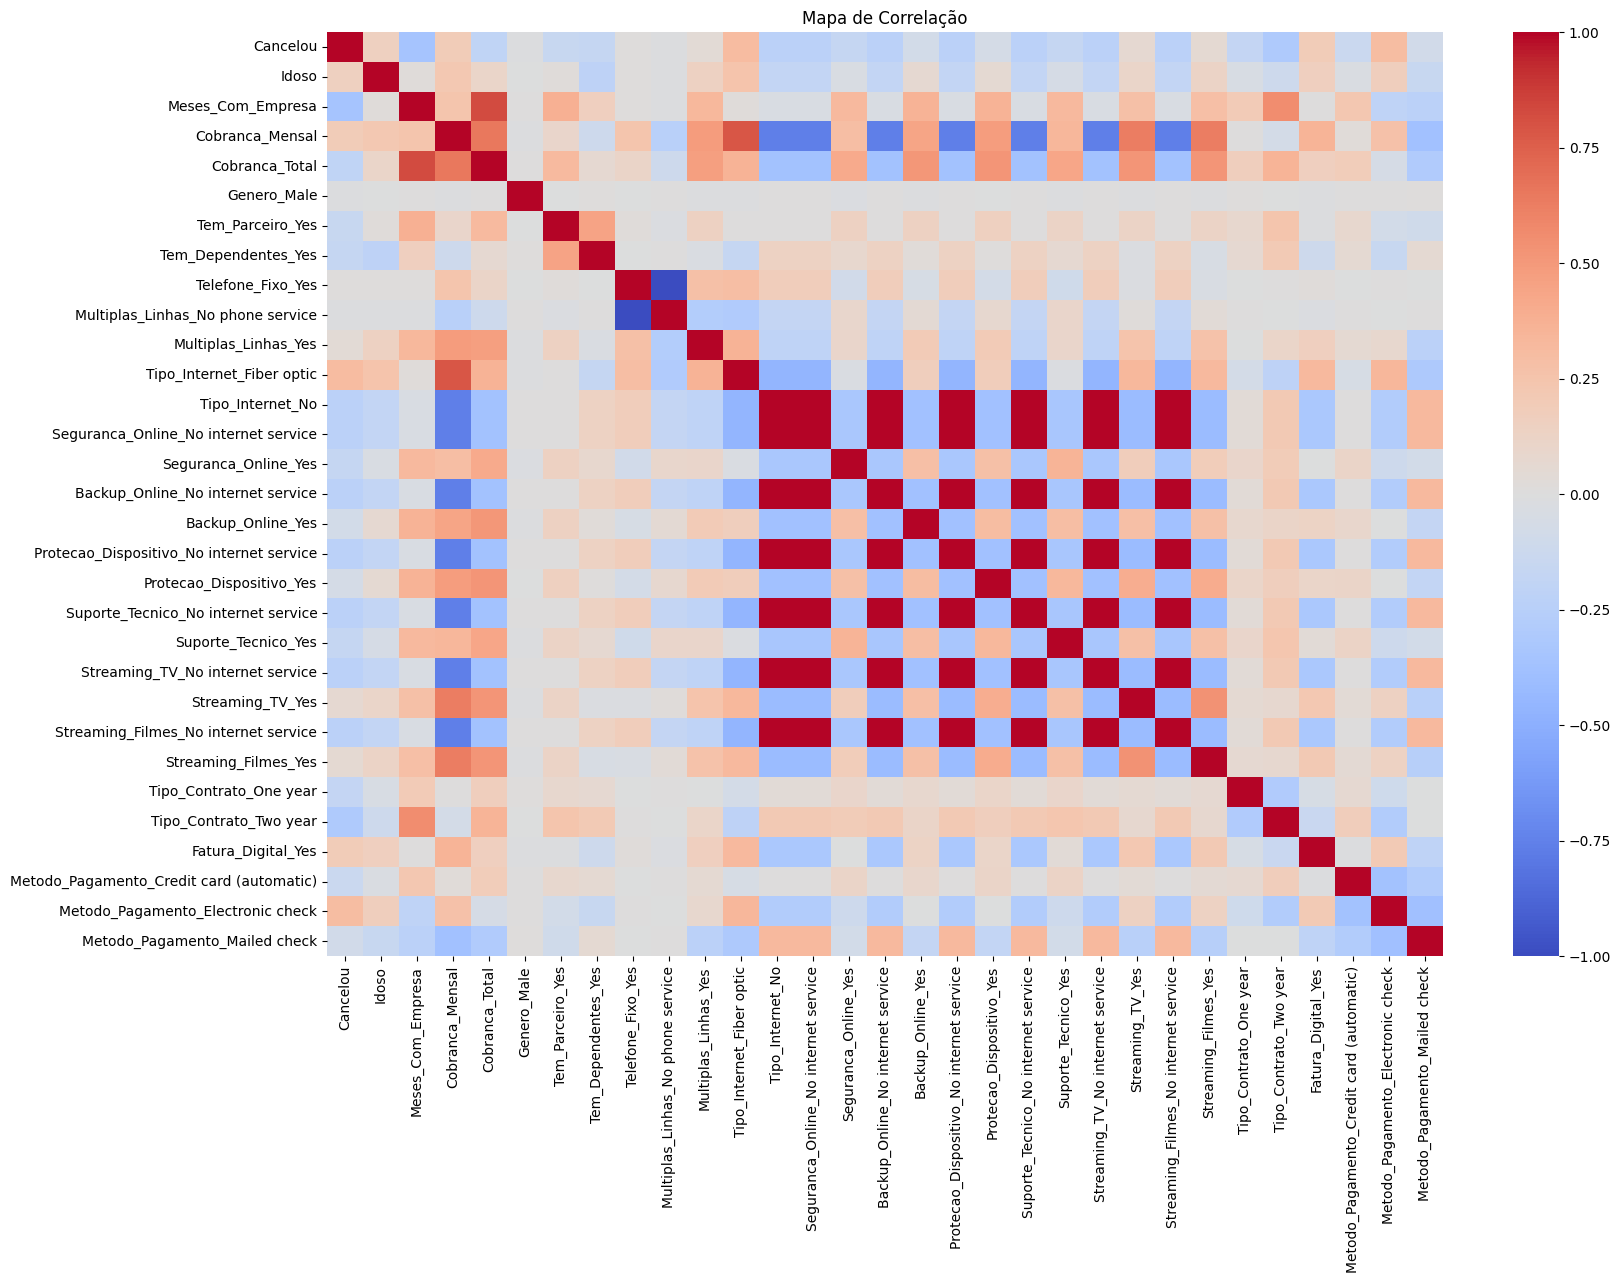

In [15]:
#  Criando heatmap de correlação
plt.figure(figsize=(18,12))
sns.heatmap(numericas_df_codificado.corr(), cmap='coolwarm')
plt.title('Mapa de Correlação')
plt.show()

Para visualizar melhor os dados visto que estammos com diversas variáveis montaremos um Data Frame para entendimento

In [16]:
# Calculando correlação com o target 'Cancelou'
correlacao_cancelou = numericas_df_codificado.corr()['Cancelou'].sort_values(ascending=False)

# Transformando em DataFrame para visualização clara
tabela_correlacao = pd.DataFrame(correlacao_cancelou)

# Exibindo a tabela
tabela_correlacao

,Cancelou
Cancelou,1.000000
Tipo_Internet_Fiber optic,0.308020
Metodo_Pagamento_Electronic check,0.301919
Cobranca_Mensal,0.193356
Fatura_Digital_Yes,0.191825
Idoso,0.150889
Streaming_TV_Yes,0.063228
Streaming_Filmes_Yes,0.061382
Multiplas_Linhas_Yes,0.040102
Telefone_Fixo_Yes,0.011942


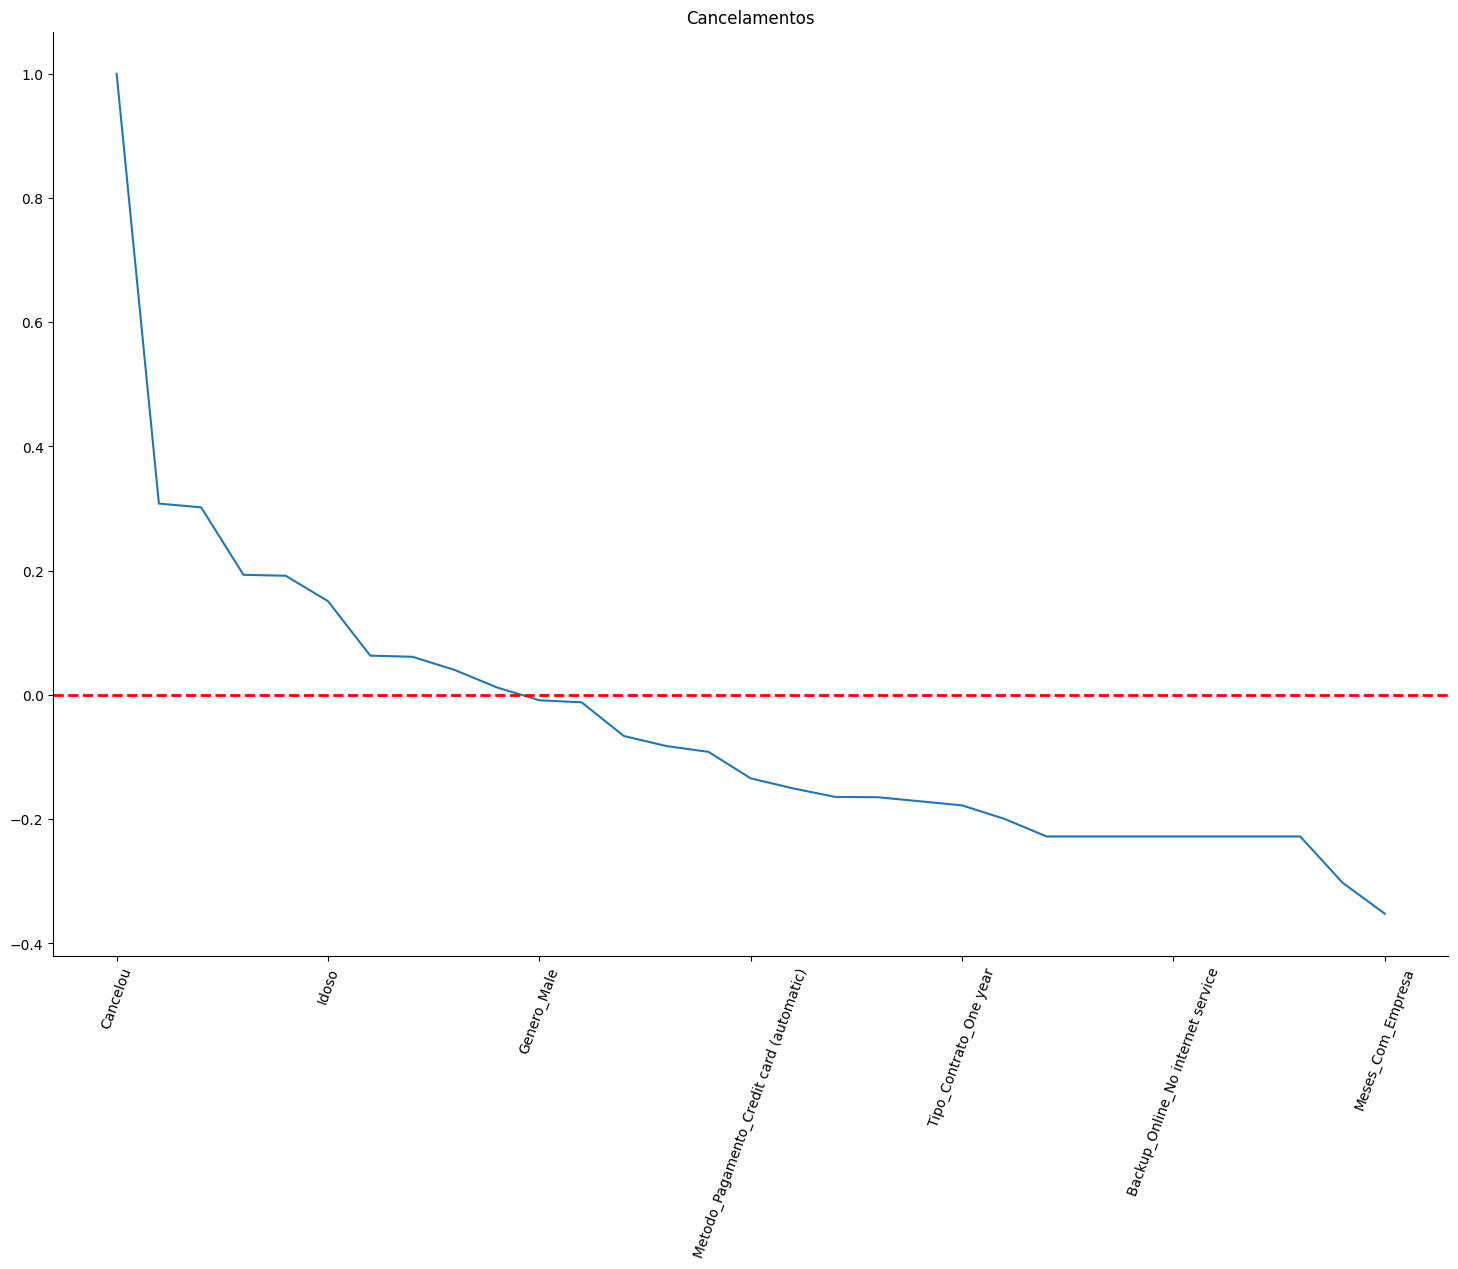

In [17]:
# Visualizando os cancelamentos em um grafico de linhas

from matplotlib import pyplot as plt

# Plotando o gráfico de linha
tabela_correlacao['Cancelou'].plot(kind='line', figsize=(18, 12), title='Cancelamentos')

# Adicionando linha vermelha no zero
plt.axhline(0, color='red', linestyle='--', linewidth=2)

# Rotacionando os labels do eixo x
plt.xticks(rotation=70)

# Removendo as bordas superiores e direitas
plt.gca().spines[['top', 'right']].set_visible(False)

# Exibindo o gráfico
plt.show()

# ✂ *Validação e Classificação dos dados*

In [18]:
# verificando se ainda há valores inválidos
df_codificado.isnull().sum()

,0
ID_Cliente,0
Cancelou,0
Idoso,0
Meses_Com_Empresa,0
Cobranca_Mensal,0
Cobranca_Total,11
Genero_Male,0
Tem_Parceiro_Yes,0
Tem_Dependentes_Yes,0
Telefone_Fixo_Yes,0


In [19]:
# conforme verificado a coluna cobrança total contem 11 clientes com valores em branco provavelmente de clientes novos então vamos solucionar
# Imputando média nos valores ausentes de Cobranca_Total
df_codificado['Cobranca_Total'] = df_codificado['Cobranca_Total'].fillna(df_codificado['Cobranca_Total'].mean())
# verificando se ainda há valores inválidos
df_codificado.isnull().sum()

,0
ID_Cliente,0
Cancelou,0
Idoso,0
Meses_Com_Empresa,0
Cobranca_Mensal,0
Cobranca_Total,0
Genero_Male,0
Tem_Parceiro_Yes,0
Tem_Dependentes_Yes,0
Telefone_Fixo_Yes,0


In [20]:
# Removendo ID_Cliente antes da modelagem
df_codificado = df_codificado.drop('ID_Cliente', axis=1)

# ⏰  Preparação para modelagem
*- Split dos dados -*

In [21]:
# Separando X e y
X = df_codificado.drop('Cancelou', axis=1)
y = df_codificado['Cancelou']


In [22]:
#Visualizando X (MAIUSCULO)
X

,Idoso,Meses_Com_Empresa,Cobranca_Mensal,Cobranca_Total,Genero_Male,Tem_Parceiro_Yes,Tem_Dependentes_Yes,Telefone_Fixo_Yes,Multiplas_Linhas_No phone service,Multiplas_Linhas_Yes,...,Streaming_TV_No internet service,Streaming_TV_Yes,Streaming_Filmes_No internet service,Streaming_Filmes_Yes,Tipo_Contrato_One year,Tipo_Contrato_Two year,Fatura_Digital_Yes,Metodo_Pagamento_Credit card (automatic),Metodo_Pagamento_Electronic check,Metodo_Pagamento_Mailed check
0,0,9,65.60,593.30,False,True,True,True,False,False,...,False,True,False,False,True,False,True,False,False,True
1,0,9,59.90,542.40,True,False,False,True,False,True,...,False,False,False,True,False,False,False,False,False,True
2,0,4,73.90,280.85,True,False,False,True,False,False,...,False,False,False,False,False,False,True,False,True,False
3,1,13,98.00,1237.85,True,True,False,True,False,False,...,False,True,False,True,False,False,True,False,True,False
4,1,3,83.90,267.40,False,True,False,True,False,False,...,False,True,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,0,13,55.15,742.90,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,True
7263,0,22,85.10,1873.70,True,True,False,True,False,True,...,False,False,False,True,False,False,True,False,True,False
7264,0,2,50.30,92.75,True,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,True
7265,0,67,67.85,4627.65,True,True,True,True,False,False,...,False,False,False,True,False,True,False,False,False,True


In [23]:
#Visualizando Y (Minúsculo)
y

,Cancelou
0,0
1,0
2,1
3,1
4,1
...,...
7262,0
7263,1
7264,0
7265,0


In [24]:
# Separando o Split treino/teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [25]:
# Conferindo as dimensões
print("Treino:", X_train.shape)
print("Teste:", X_test.shape)

Treino: (4930, 30)
Teste: (2113, 30)


# ***Criação dos modelos preditivos***:

***LogisticRegression***



In [26]:
# Importando bibliotecas
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt


In [27]:
# Criando o modelo de Regressão Logística
modelo_log = LogisticRegression(max_iter=1000, random_state=42)

# Treinando o modelo com os dados de treino
modelo_log.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=42)

In [28]:
# Realizando previsões
y_pred = modelo_log.predict(X_test)
y_proba = modelo_log.predict_proba(X_test)[:,1]  # Probabilidades para ROC-AUC


***Avaliando o modelo***

Accuracy: 0.8163748225272125

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      1562
           1       0.68      0.57      0.62       551

    accuracy                           0.82      2113
   macro avg       0.77      0.74      0.75      2113
weighted avg       0.81      0.82      0.81      2113



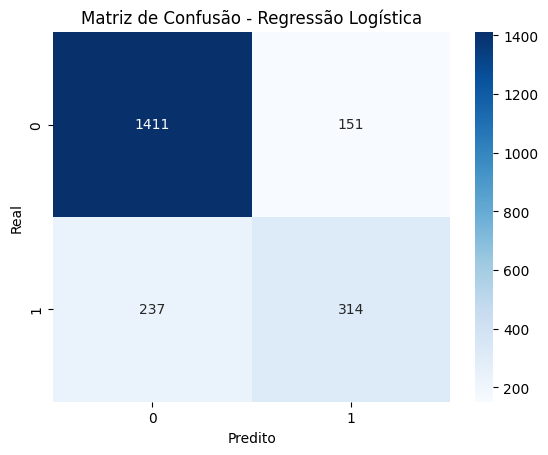

ROC-AUC Score: 0.8433566254813156


In [29]:
# Accuracy - Acurácia
print("Accuracy:", accuracy_score(y_test, y_pred))

# Classification report (precision, recall, f1-score)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix - Matrix de confusão
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusão - Regressão Logística")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.show()

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_proba)
print("ROC-AUC Score:", roc_auc)


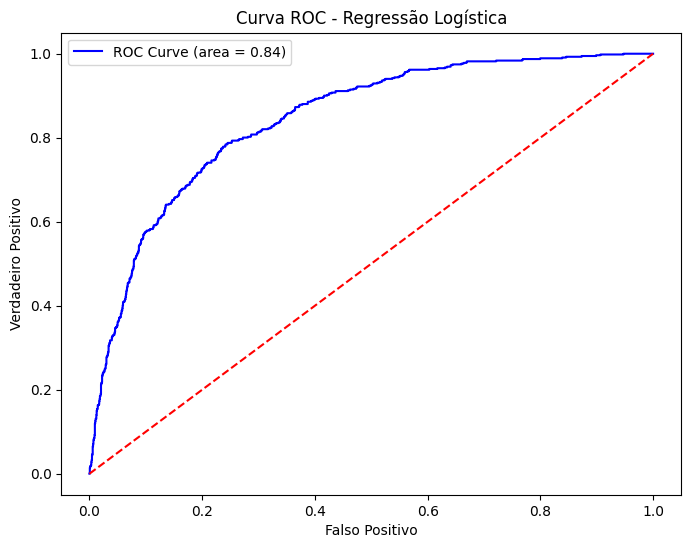

In [30]:
# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0,1], [0,1], color='red', linestyle='--')
plt.xlabel('Falso Positivo')
plt.ylabel('Verdadeiro Positivo')
plt.title('Curva ROC - Regressão Logística')
plt.legend()
plt.show()


# ✈# ***Salvando o modelo***

In [42]:
# importando a bibioteca
import pickle

# Salvar modelo treinado como pickle
with open('modelo_logistico.pkl', 'wb') as file:
    pickle.dump(modelo_log, file)


***Random Forest***

In [31]:
# Importando a biblioteca
from sklearn.ensemble import RandomForestClassifier


In [32]:
# Criando o modelo Random Forest
modelo_rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Treinando o modelo
modelo_rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [33]:
# Realizando previsões
y_pred_rf = modelo_rf.predict(X_test)
y_proba_rf = modelo_rf.predict_proba(X_test)[:,1]  # Probabilidades para ROC-AUC


Accuracy: 0.7808802650260294

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.90      0.86      1562
           1       0.61      0.44      0.51       551

    accuracy                           0.78      2113
   macro avg       0.72      0.67      0.69      2113
weighted avg       0.77      0.78      0.77      2113



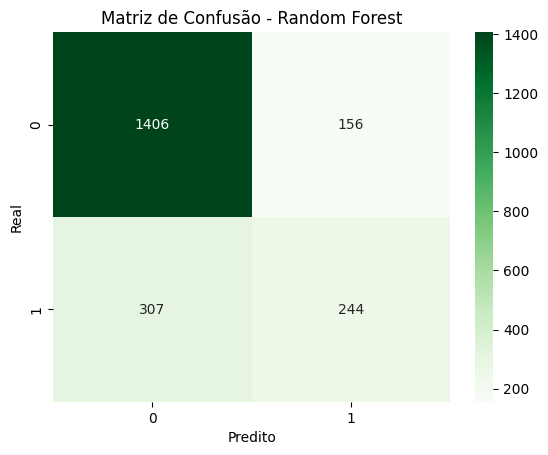

ROC-AUC Score: 0.8152172397526555


In [34]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

# Accuracy - Acurácia
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

# Confusion Matrixn - Matrix de confusão
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
plt.title("Matriz de Confusão - Random Forest")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.show()

# ROC-AUC Score
roc_auc_rf = roc_auc_score(y_test, y_proba_rf)
print("ROC-AUC Score:", roc_auc_rf)


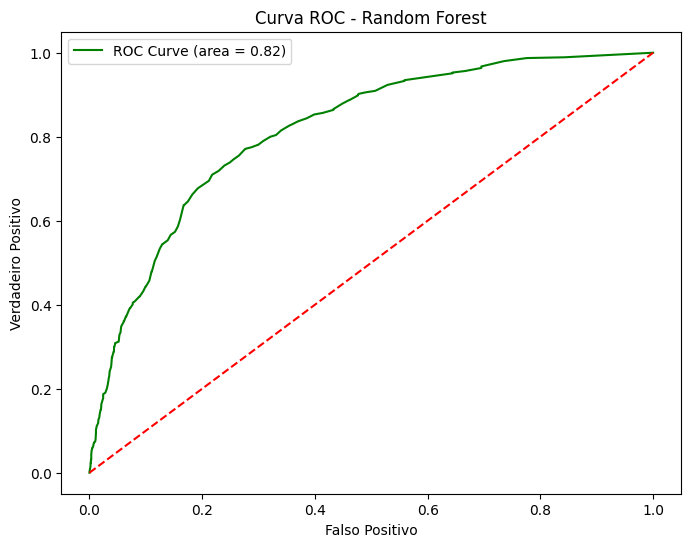

In [35]:
# Curva ROC
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_proba_rf)
plt.figure(figsize=(8,6))
plt.plot(fpr_rf, tpr_rf, color='green', label=f'ROC Curve (area = {roc_auc_rf:.2f})')
plt.plot([0,1], [0,1], color='red', linestyle='--')
plt.xlabel('Falso Positivo')
plt.ylabel('Verdadeiro Positivo')
plt.title('Curva ROC - Random Forest')
plt.legend()
plt.show()


***Comparação das métricas***

In [36]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculando métricas para Regressão Logística
accuracy_log = accuracy_score(y_test, y_pred)
precision_log = precision_score(y_test, y_pred)
recall_log = recall_score(y_test, y_pred)
f1_log = f1_score(y_test, y_pred)
roc_auc_log = roc_auc_score(y_test, y_proba)

# Calculando métricas para Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_proba_rf)

# Criando DataFrame comparativo
import pandas as pd

comparativo_modelos = pd.DataFrame({
    'Regressao_Logistica': [accuracy_log, precision_log, recall_log, f1_log, roc_auc_log],
    'Random_Forest': [accuracy_rf, precision_rf, recall_rf, f1_rf, roc_auc_rf]
}, index=['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC'])

# Exibindo tabela
print(comparativo_modelos)


           Regressao_Logistica  Random_Forest
Accuracy              0.816375       0.780880
Precision             0.675269       0.610000
Recall                0.569873       0.442831
F1-Score              0.618110       0.513144
ROC-AUC               0.843357       0.815217


# ***Feature Importances do Random Forest***

In [37]:
# Extraindo feature importances do modelo Random Forest
importances = modelo_rf.feature_importances_

# Criando DataFrame com nomes das features
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})

# Ordenando do mais importante para o menos importante
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Exibindo tabela
print(feature_importances)


                                     Feature  Importance
3                             Cobranca_Total    0.188081
1                          Meses_Com_Empresa    0.174562
2                            Cobranca_Mensal    0.168882
28         Metodo_Pagamento_Electronic check    0.037293
10                 Tipo_Internet_Fiber optic    0.036731
25                    Tipo_Contrato_Two year    0.034123
4                                Genero_Male    0.028864
26                        Fatura_Digital_Yes    0.026265
13                      Seguranca_Online_Yes    0.024122
24                    Tipo_Contrato_One year    0.023949
15                         Backup_Online_Yes    0.023244
5                           Tem_Parceiro_Yes    0.022962
19                       Suporte_Tecnico_Yes    0.022834
9                       Multiplas_Linhas_Yes    0.019747
0                                      Idoso    0.019628
6                        Tem_Dependentes_Yes    0.018938
17                  Protecao_Di

/tmp/ipython-input-38-4000702609.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances.head(10), palette='viridis')


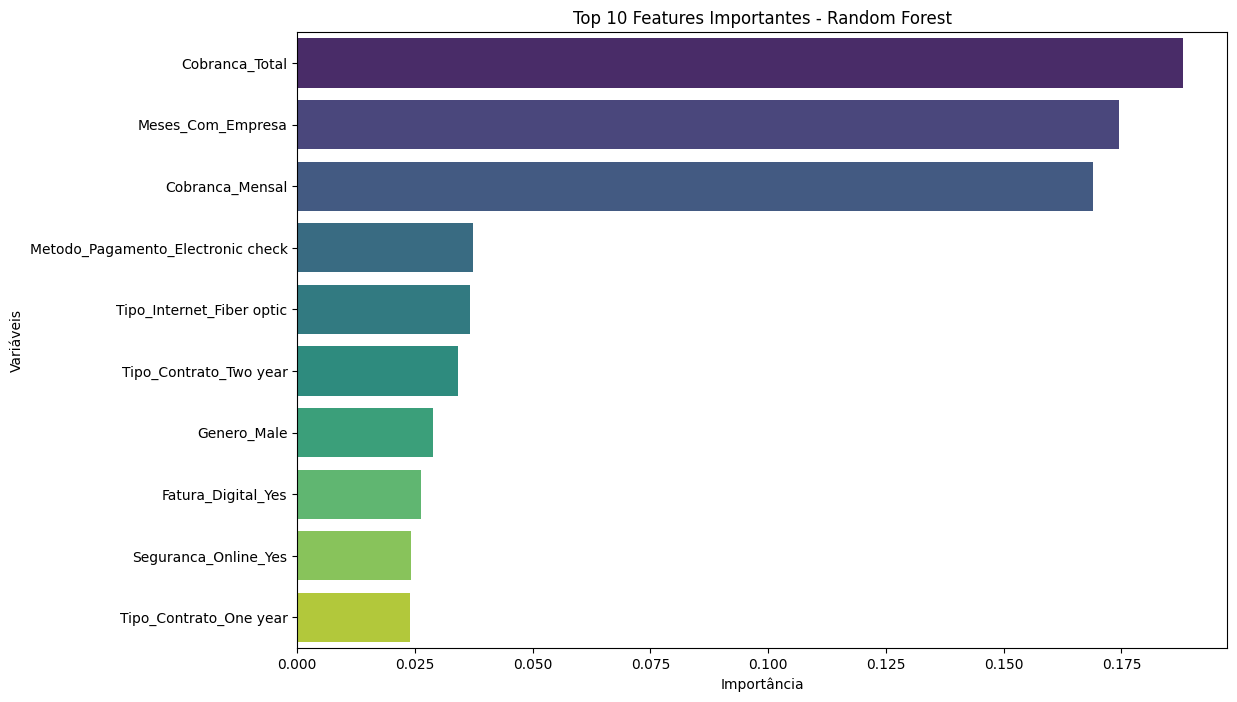

In [38]:
# Plotando gráfico de barras das top 10 features mais importantes
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
sns.barplot(x='Importance', y='Feature', data=feature_importances.head(10), palette='viridis')
plt.title('Top 10 Features Importantes - Random Forest')
plt.xlabel('Importância')
plt.ylabel('Variáveis')
plt.show()


# ***✅ Conclusão Final – Projeto Telecom X***


🎯 Resumo dos resultados
Nesta etapa do projeto foram criados dois modelos preditivos para previsão do cancelamento de clientes (churn):

Regressão Logística:
Obteve métricas sólidas e alta interpretabilidade, sendo útil como baseline para problemas de classificação binária.

Random Forest:
Apesar de ligeiramente inferior em algumas métricas comparado à Regressão Logística, apresentou robustez e trouxe insights importantes ao identificar as variáveis mais influentes no cancelamento.

📊 Principais fatores que influenciam o churn
Com base na análise de feature importances do modelo Random Forest, destacam-se:

Cobrança Total (Cobranca_Total)
Clientes com maior cobrança total (planos agregados, pacotes completos) têm menor probabilidade de cancelar. Isso indica que clientes que utilizam mais serviços (ex.: internet + telefone fixo + streaming) apresentam maior fidelização.

Meses com a Empresa (Meses_Com_Empresa)
Clientes com mais tempo de relacionamento têm menor taxa de churn, evidenciando que ações de fidelização ao longo do tempo podem reduzir o cancelamento.

Tipo de Contrato
Planos mensais possuem maior probabilidade de churn comparado a contratos anuais ou bianuais. Isso demonstra a importância de oferecer contratos com fidelização ou vantagens para longo prazo.

🔎 Sugestões estratégicas para o negócio
✔️ Incentivar contratação de pacotes completos, incluindo internet, telefonia e streaming em um único plano.
✔️ Estimular planos com fidelização anual ou bianual, oferecendo benefícios claros para reduzir cancelamentos.
✔️ Investir em programas de retenção focados nos clientes com menos de 2 meses de empresa, já que apresentam maior churn inicial.

/tmp/ipython-input-39-1200959679.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Tipo_Contrato', y='Cancelou', data=df, estimator=lambda x: sum(x)/len(x), palette='Set2')


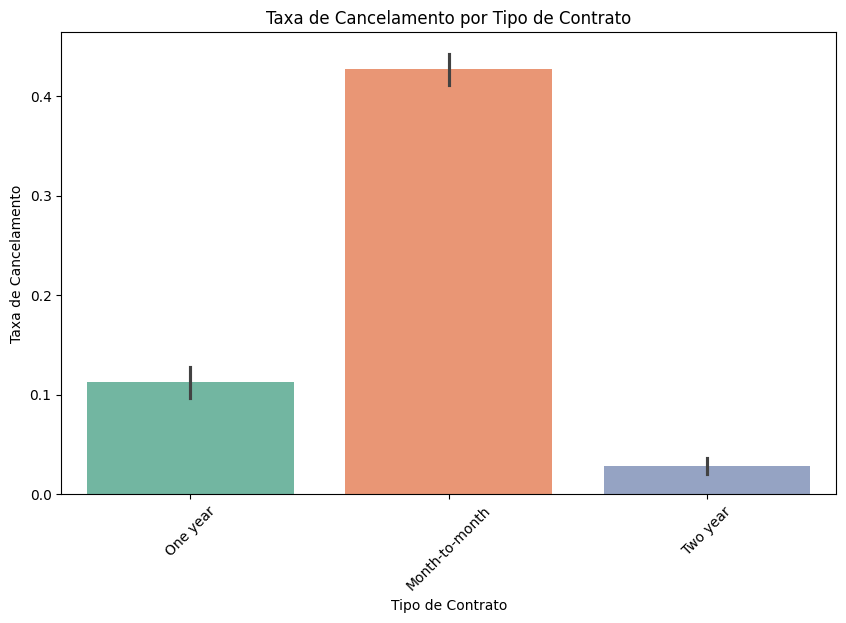

In [39]:
# Gráfico: Cancelamento por Tipo de Contrato
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.barplot(x='Tipo_Contrato', y='Cancelou', data=df, estimator=lambda x: sum(x)/len(x), palette='Set2')
plt.title('Taxa de Cancelamento por Tipo de Contrato')
plt.ylabel('Taxa de Cancelamento')
plt.xlabel('Tipo de Contrato')
plt.xticks(rotation=45)
plt.show()


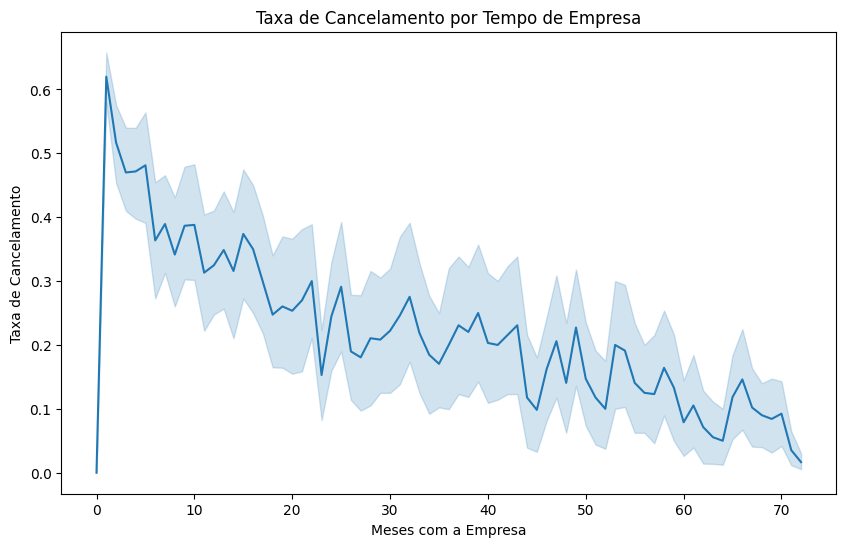

In [40]:
# Gráfico: Cancelamento por Meses com a Empresa
plt.figure(figsize=(10,6))
sns.lineplot(x='Meses_Com_Empresa', y='Cancelou', data=df, estimator=lambda x: sum(x)/len(x))
plt.title('Taxa de Cancelamento por Tempo de Empresa')
plt.ylabel('Taxa de Cancelamento')
plt.xlabel('Meses com a Empresa')
plt.show()


/tmp/ipython-input-41-1422623350.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Faixa_Cobranca_Total', y='Cancelou', data=df, estimator=lambda x: sum(x)/len(x), palette='Set1')


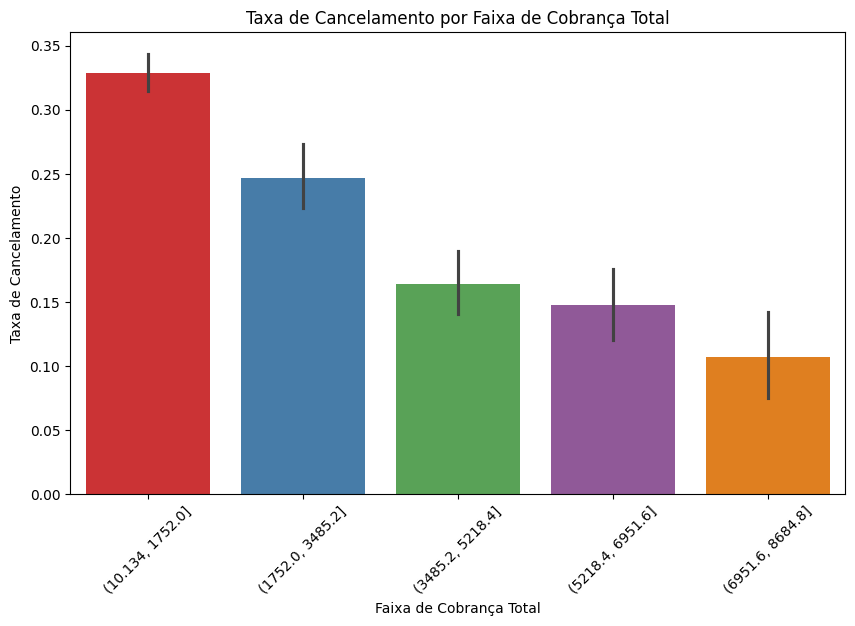

In [41]:
# Criando faixa de cobrança total
df['Faixa_Cobranca_Total'] = pd.cut(df['Cobranca_Total'], bins=5)

# Gráfico: Cancelamento por Faixa de Cobrança Total
plt.figure(figsize=(10,6))
sns.barplot(x='Faixa_Cobranca_Total', y='Cancelou', data=df, estimator=lambda x: sum(x)/len(x), palette='Set1')
plt.title('Taxa de Cancelamento por Faixa de Cobrança Total')
plt.ylabel('Taxa de Cancelamento')
plt.xlabel('Faixa de Cobrança Total')
plt.xticks(rotation=45)
plt.show()


# ✨ Conclusão Geral
A análise demonstrou que cobrança total mais alta (planos completos), maior tempo de empresa e contratos anuais/bianuais estão fortemente associados à menor taxa de churn. Esses insights permitem à Telecom X criar estratégias direcionadas para fidelização, potencializando resultados e reduzindo perdas financeiras com cancelamentos.